In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as olt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('cancer_classification.csv')

In [90]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
#df.info()

In [92]:
#df.isnull().count()

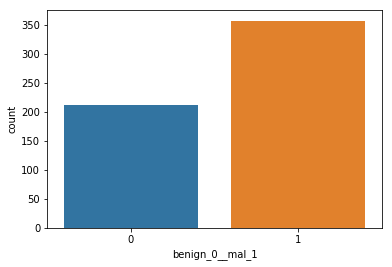

In [93]:
sns.countplot(x='benign_0__mal_1', data=df)

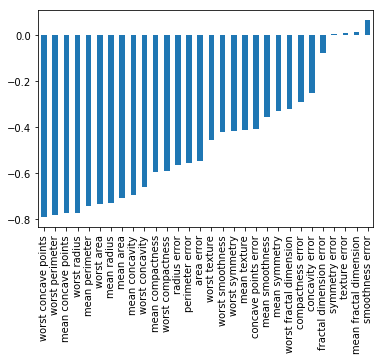

In [94]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

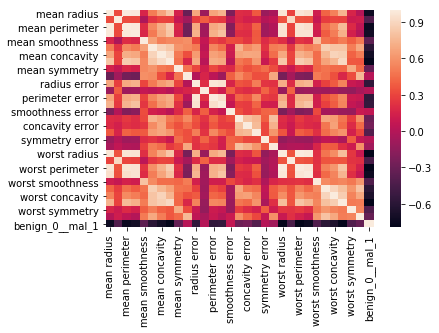

In [95]:
sns.heatmap(df.corr())

In [96]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [97]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()

In [110]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [112]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [113]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6727 - val_loss: 0.6416
Epoch 2/600
426/426 [==============================] - 0s 169us/sample - loss: 0.6237 - val_loss: 0.5949
Epoch 3/600
426/426 [==============================] - 0s 143us/sample - loss: 0.5752 - val_loss: 0.5493
Epoch 4/600
426/426 [==============================] - 0s 274us/sample - loss: 0.5318 - val_loss: 0.5030
Epoch 5/600
426/426 [==============================] - 0s 192us/sample - loss: 0.4836 - val_loss: 0.4539
Epoch 6/600
426/426 [==============================] - 0s 150us/sample - loss: 0.4339 - val_loss: 0.4031
Epoch 7/600
426/426 [==============================] - 0s 183us/sample - loss: 0.3865 - val_loss: 0.3564
Epoch 8/600
426/426 [==============================] - 0s 232us/sample - loss: 0.3448 - val_loss: 0.3153
Epoch 9/600
426/426 [==============================] - 0s 148us/sample - loss: 0.3090 - val_loss: 0.2826
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 253us/sample - loss: 0.0537 - val_loss: 0.1008
Epoch 79/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0522 - val_loss: 0.1054
Epoch 80/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0520 - val_loss: 0.1050
Epoch 81/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0508 - val_loss: 0.1029
Epoch 82/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0507 - val_loss: 0.1083
Epoch 83/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0506 - val_loss: 0.1078
Epoch 84/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0544 - val_loss: 0.1067
Epoch 85/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0528 - val_loss: 0.1064
Epoch 86/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0498 - val_loss: 0.1036
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 481us/sample - loss: 0.0355 - val_loss: 0.1150
Epoch 156/600
426/426 [==============================] - 0s 319us/sample - loss: 0.0365 - val_loss: 0.1281
Epoch 157/600
426/426 [==============================] - 0s 375us/sample - loss: 0.0402 - val_loss: 0.1125
Epoch 158/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0412 - val_loss: 0.1193
Epoch 159/600
426/426 [==============================] - 0s 443us/sample - loss: 0.0378 - val_loss: 0.1150
Epoch 160/600
426/426 [==============================] - 0s 359us/sample - loss: 0.0349 - val_loss: 0.1222
Epoch 161/600
426/426 [==============================] - 0s 307us/sample - loss: 0.0349 - val_loss: 0.1189
Epoch 162/600
426/426 [==============================] - 0s 446us/sample - loss: 0.0354 - val_loss: 0.1216
Epoch 163/600
426/426 [==============================] - 0s 364us/sample - loss: 0.0340 - val_loss: 0.1199
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 273us/sample - loss: 0.0254 - val_loss: 0.1504
Epoch 232/600
426/426 [==============================] - 0s 487us/sample - loss: 0.0267 - val_loss: 0.1210
Epoch 233/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0253 - val_loss: 0.1485
Epoch 234/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0237 - val_loss: 0.1292
Epoch 235/600
426/426 [==============================] - 0s 260us/sample - loss: 0.0233 - val_loss: 0.1300
Epoch 236/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0232 - val_loss: 0.1360
Epoch 237/600
426/426 [==============================] - 0s 300us/sample - loss: 0.0292 - val_loss: 0.1379
Epoch 238/600
426/426 [==============================] - 0s 342us/sample - loss: 0.0249 - val_loss: 0.1263
Epoch 239/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0232 - val_loss: 0.1301
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 279us/sample - loss: 0.0175 - val_loss: 0.1383
Epoch 308/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0156 - val_loss: 0.1406
Epoch 309/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0149 - val_loss: 0.1432
Epoch 310/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0146 - val_loss: 0.1421
Epoch 311/600
426/426 [==============================] - 0s 267us/sample - loss: 0.0170 - val_loss: 0.1521
Epoch 312/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0149 - val_loss: 0.1406
Epoch 313/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0146 - val_loss: 0.1377
Epoch 314/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0157 - val_loss: 0.1387
Epoch 315/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0138 - val_loss: 0.1492
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 249us/sample - loss: 0.0108 - val_loss: 0.1827
Epoch 384/600
426/426 [==============================] - 0s 285us/sample - loss: 0.0099 - val_loss: 0.1773
Epoch 385/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0108 - val_loss: 0.1589
Epoch 386/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0129 - val_loss: 0.1810
Epoch 387/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0114 - val_loss: 0.1781
Epoch 388/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0099 - val_loss: 0.1732
Epoch 389/600
426/426 [==============================] - 0s 320us/sample - loss: 0.0092 - val_loss: 0.1761
Epoch 390/600
426/426 [==============================] - 0s 654us/sample - loss: 0.0099 - val_loss: 0.1644
Epoch 391/600
426/426 [==============================] - 0s 590us/sample - loss: 0.0102 - val_loss: 0.1881
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 152us/sample - loss: 0.0085 - val_loss: 0.1854
Epoch 460/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0069 - val_loss: 0.2172
Epoch 461/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0077 - val_loss: 0.1802
Epoch 462/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0063 - val_loss: 0.2388
Epoch 463/600
426/426 [==============================] - 0s 394us/sample - loss: 0.0072 - val_loss: 0.1916
Epoch 464/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0072 - val_loss: 0.2266
Epoch 465/600
426/426 [==============================] - 0s 199us/sample - loss: 0.0066 - val_loss: 0.2010
Epoch 466/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0072 - val_loss: 0.1931
Epoch 467/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0077 - val_loss: 0.2084
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 601us/sample - loss: 0.0040 - val_loss: 0.2265
Epoch 536/600
426/426 [==============================] - 0s 859us/sample - loss: 0.0058 - val_loss: 0.2005
Epoch 537/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0079 - val_loss: 0.2898
Epoch 538/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0045 - val_loss: 0.1996
Epoch 539/600
426/426 [==============================] - 0s 298us/sample - loss: 0.0040 - val_loss: 0.2347
Epoch 540/600
426/426 [==============================] - 0s 300us/sample - loss: 0.0041 - val_loss: 0.2241
Epoch 541/600
426/426 [==============================] - 0s 380us/sample - loss: 0.0040 - val_loss: 0.2240
Epoch 542/600
426/426 [==============================] - 0s 343us/sample - loss: 0.0038 - val_loss: 0.2445
Epoch 543/600
426/426 [==============================] - 0s 399us/sample - loss: 0.0048 - val_loss: 0.2326
Epoch 544/600
426/426 [============================

In [115]:
losses= pd.DataFrame(model.history.history)

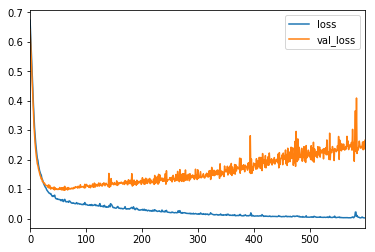

In [116]:
losses.plot()

In [117]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

In [121]:
#help(EarlyStopping)

In [122]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [123]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6502 - val_loss: 0.6219
Epoch 2/600
426/426 [==============================] - 0s 207us/sample - loss: 0.5901 - val_loss: 0.5647
Epoch 3/600
426/426 [==============================] - 0s 225us/sample - loss: 0.5350 - val_loss: 0.5056
Epoch 4/600
426/426 [==============================] - 0s 223us/sample - loss: 0.4790 - val_loss: 0.4531
Epoch 5/600
426/426 [==============================] - 0s 218us/sample - loss: 0.4317 - val_loss: 0.4075
Epoch 6/600
426/426 [==============================] - 0s 221us/sample - loss: 0.3897 - val_loss: 0.3620
Epoch 7/600
426/426 [==============================] - 0s 254us/sample - loss: 0.3514 - val_loss: 0.3234
Epoch 8/600
426/426 [==============================] - 0s 190us/sample - loss: 0.3169 - val_loss: 0.2862
Epoch 9/600
426/426 [==============================] - 0s 237us/sample - loss: 0.2858 - val_loss: 0.2577
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 432us/sample - loss: 0.0549 - val_loss: 0.0931
Epoch 79/600
426/426 [==============================] - 0s 436us/sample - loss: 0.0504 - val_loss: 0.0791
Epoch 80/600
426/426 [==============================] - 0s 378us/sample - loss: 0.0493 - val_loss: 0.0968
Epoch 81/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0498 - val_loss: 0.0804
Epoch 82/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0491 - val_loss: 0.0850
Epoch 83/600
426/426 [==============================] - 0s 254us/sample - loss: 0.0499 - val_loss: 0.0804
Epoch 84/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0476 - val_loss: 0.0842
Epoch 85/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0490 - val_loss: 0.0831
Epoch 86/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0481 - val_loss: 0.0769
Epoch 87/600
426/426 [========================

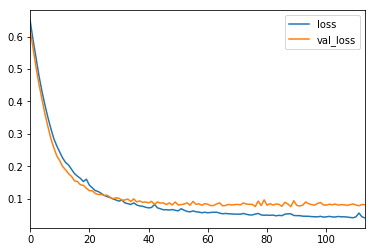

In [124]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [126]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [127]:
model.fit(x=X_train, y=y_train, epochs=600, 
          validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.7277 - val_loss: 0.6905
Epoch 2/600
426/426 [==============================] - 0s 249us/sample - loss: 0.7043 - val_loss: 0.6663
Epoch 3/600
426/426 [==============================] - 0s 242us/sample - loss: 0.6672 - val_loss: 0.6456
Epoch 4/600
426/426 [==============================] - 0s 258us/sample - loss: 0.6492 - val_loss: 0.6276
Epoch 5/600
426/426 [==============================] - 0s 238us/sample - loss: 0.6325 - val_loss: 0.6076
Epoch 6/600
426/426 [==============================] - 0s 252us/sample - loss: 0.6212 - val_loss: 0.5882
Epoch 7/600
426/426 [==============================] - 0s 214us/sample - loss: 0.5968 - val_loss: 0.5659
Epoch 8/600
426/426 [==============================] - 0s 254us/sample - loss: 0.5792 - val_loss: 0.5436
Epoch 9/600
426/426 [==============================] - 0s 220us/sample - loss: 0.5728 - val_loss: 0.5187
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 328us/sample - loss: 0.1079 - val_loss: 0.0832
Epoch 79/600
426/426 [==============================] - 0s 371us/sample - loss: 0.0974 - val_loss: 0.0788
Epoch 80/600
426/426 [==============================] - 0s 235us/sample - loss: 0.1253 - val_loss: 0.0830
Epoch 81/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0926 - val_loss: 0.0807
Epoch 82/600
426/426 [==============================] - 0s 229us/sample - loss: 0.1042 - val_loss: 0.0994
Epoch 83/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0953 - val_loss: 0.0834
Epoch 84/600
426/426 [==============================] - 0s 230us/sample - loss: 0.1239 - val_loss: 0.0825
Epoch 85/600
426/426 [==============================] - 0s 254us/sample - loss: 0.0993 - val_loss: 0.0949
Epoch 86/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0884 - val_loss: 0.0832
Epoch 87/600
426/426 [========================

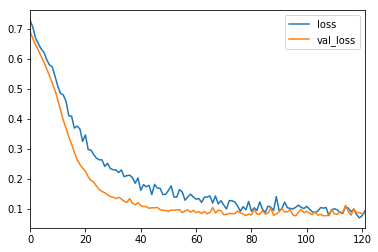

In [128]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [130]:
y_pred=model.predict_classes(X_test)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
